In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import cv2

In [5]:
import tensorflow as tf

In [47]:
import matplotlib.pyplot as plt

In [37]:
path="C:/Users/ny691/Downloads/Maleria_Dataset/cell_images/"

In [38]:
ls=["Uninfected","Parasitized"]

In [49]:
inden_col=[]
depen_col=[]
for n,i in enumerate(ls):
    c=0
    for e in os.listdir(path+i):
        img=cv2.imread(path+i+"/"+e)
        img=cv2.resize(img,(96,96))
        inden_col.append(img)
        depen_col.append(n)
        c=c+1
        if c==3300:
            break
        

In [50]:
len(inden_col)

6600

In [51]:
inden_col[1].shape

(96, 96, 3)

In [52]:
indepen=np.array(inden_col)

In [53]:
indepen.shape

(6600, 96, 96, 3)

In [54]:
depen=np.array(depen_col)

In [55]:
depen

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
depen.shape

(6600,)

In [57]:
indepen

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

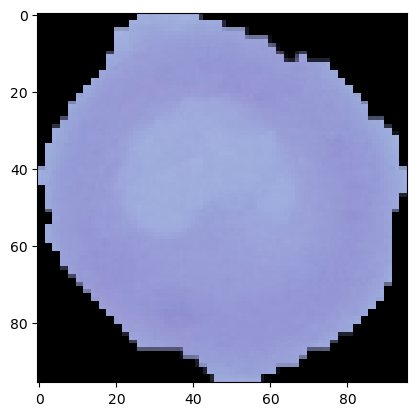

In [58]:
plt.imshow(indepen[1])

### Scaling

In [59]:
x=indepen/255.0

In [61]:
x.max()

1.0

In [62]:
x.min()

0.0

In [65]:
y=depen

### Spliting Data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [68]:
x_train.shape,x_test.shape

((5280, 96, 96, 3), (1320, 96, 96, 3))

In [69]:
y_train.shape,y_test.shape

((5280,), (1320,))

In [70]:
y_train.shape,y_test.shape

((5280,), (1320,))

### Model Building

In [91]:
from tensorflow.keras.models import Sequential

In [92]:
from tensorflow.keras.layers import Input,Flatten,Conv2D,MaxPooling2D,Dense,Dropout

In [93]:
seq_model=Sequential()

In [94]:
seq_model.add(Input(shape=(96,96,3)))

### First Convolutional layer

In [95]:
seq_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",strides=(1,1),padding="same"))
seq_model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
seq_model.add(Dropout(0.20))

### Second Convolutional layer

In [96]:
seq_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="same"))
seq_model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
seq_model.add(Dropout(0.20))


### Third Convolutional layer

In [97]:
seq_model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",strides=(1,1),padding="same"))
seq_model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
seq_model.add(Dropout(0.20))

### Dense layer

In [98]:
seq_model.add(Flatten())

In [99]:
seq_model.add(Dense(units=256,activation="relu"))

In [100]:
seq_model.add(Dense(units=128,activation="relu"))

In [101]:
seq_model.add(Dense(units=64,activation="relu"))

In [102]:
seq_model.add(Dense(units=32,activation="relu"))

In [103]:
seq_model.add(Dense(units=16,activation="relu"))

In [104]:
seq_model.add(Dense(units=2,activation="softmax"))

In [105]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)       

In [106]:
seq_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [107]:
seq_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
165/165 [==============================] - 131s 788ms/step - loss: 0.6934 - accuracy: 0.4924
Epoch 2/20
165/165 [==============================] - 130s 790ms/step - loss: 0.6932 - accuracy: 0.5004
Epoch 3/20
165/165 [==============================] - 131s 794ms/step - loss: 0.6920 - accuracy: 0.5117
Epoch 4/20
165/165 [==============================] - 130s 787ms/step - loss: 0.6929 - accuracy: 0.5148
Epoch 5/20
165/165 [==============================] - 146s 885ms/step - loss: 0.6912 - accuracy: 0.5277
Epoch 6/20
165/165 [==============================] - 136s 825ms/step - loss: 0.6827 - accuracy: 0.5731
Epoch 7/20
165/165 [==============================] - 133s 809ms/step - loss: 0.6693 - accuracy: 0.5879
Epoch 8/20
165/165 [==============================] - 131s 795ms/step - loss: 0.5622 - accuracy: 0.7032
Epoch 9/20
165/165 [==============================] - 132s 802ms/step - loss: 0.2079 - accuracy: 0.9288
Epoch 10/20
165/165 [==============================] - 130s 789m